In [1]:
!pip install xgboost

In [2]:
!pip install shap

   ---------------------------------------- 0.0/549.1 kB ? eta -:--:--
   ---------------------------------------- 0.0/549.1 kB ? eta -:--:--
   ---------------------------------------- 549.1/549.1 kB 3.1 MB/s eta 0:00:00

   -------------------- ------------------- 1/2 [shap]
   ---------------------------------------- 2/2 [shap]



In [3]:
import pandas as pd

df = pd.read_csv("./BostonHousing.csv")
print(df.head())
boston_dataset = df
boston_dataset.info()

      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD  TAX  PTRATIO  \
0  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296     15.3   
1  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242     17.8   
2  0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242     17.8   
3  0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222     18.7   
4  0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222     18.7   

        B  LSTAT  MEDV  
0  396.90   4.98  24.0  
1  396.90   9.14  21.6  
2  392.83   4.03  34.7  
3  394.63   2.94  33.4  
4  396.90   5.33  36.2  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float6

In [6]:
boston_dataset.shape

(506, 14)

In [7]:
boston_dataset.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


Missing values per column:
CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

原始 X_full shape : (490, 13)
y shape           : (490,)



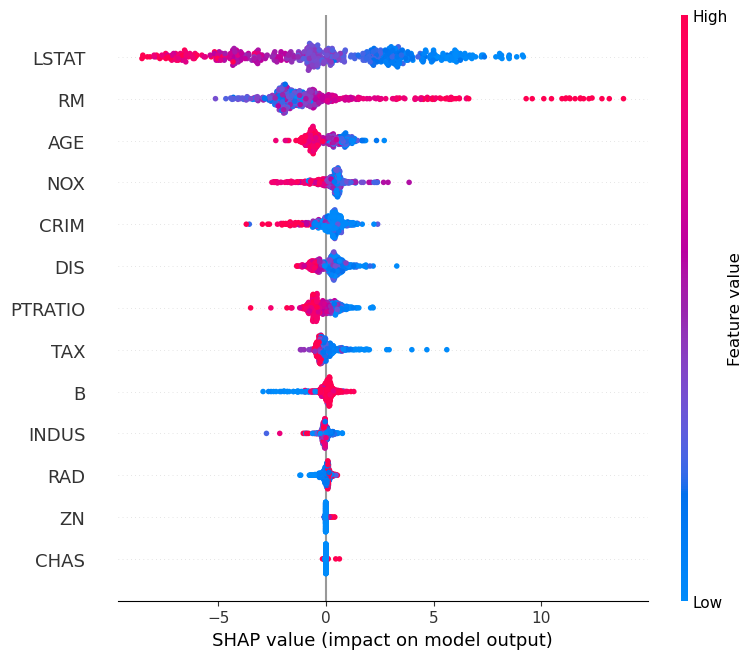

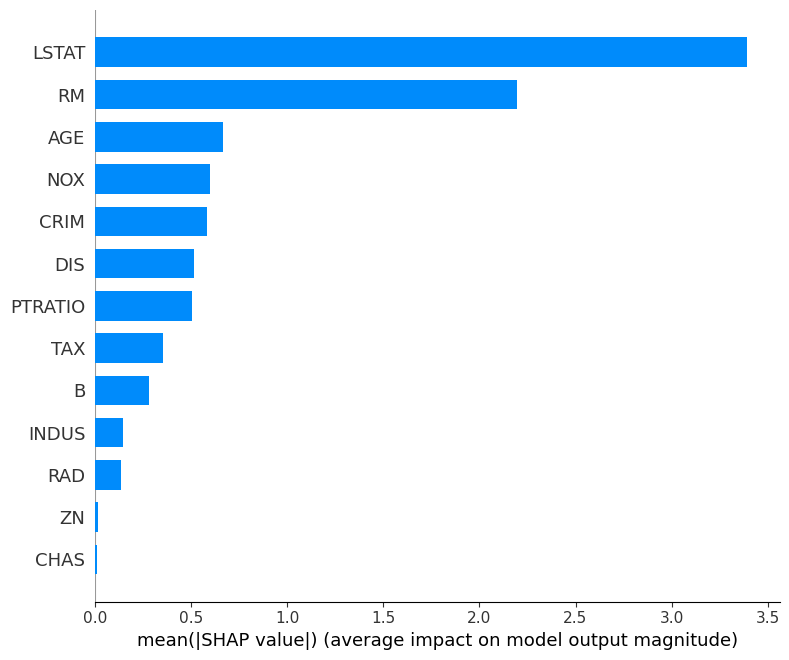


=== SHAP Feature Ranking (13 features) ===
LSTAT: 3.3934
RM: 2.1957
AGE: 0.6677
NOX: 0.5990
CRIM: 0.5831
DIS: 0.5148
PTRATIO: 0.5027
TAX: 0.3561
B: 0.2832
INDUS: 0.1451
RAD: 0.1366
ZN: 0.0182
CHAS: 0.0102

Dropped Features (by SHAP): ['RAD', 'ZN', 'CHAS']

X_full shape    : (490, 13)
X_reduced shape : (490, 10)
=== RandomizedSearchCV on X_full (13 features) ===
Fitting 5 folds for each of 40 candidates, totalling 200 fits
Best params (full): {'subsample': 0.8, 'reg_lambda': 0.5, 'reg_alpha': 0, 'n_estimators': 300, 'min_child_weight': 7, 'max_depth': 3, 'learning_rate': 0.03, 'gamma': 0, 'colsample_bytree': 0.7}
Best CV RMSE (log space): 0.18183026099703156

=== RandomizedSearchCV on X_reduced (after SHAP drop 3) ===
Fitting 5 folds for each of 40 candidates, totalling 200 fits
Best params (reduced): {'subsample': 0.8, 'reg_lambda': 0.5, 'reg_alpha': 0, 'n_estimators': 300, 'min_child_weight': 7, 'max_depth': 3, 'learning_rate': 0.03, 'gamma': 0, 'colsample_bytree': 0.7}
Best CV RMSE 

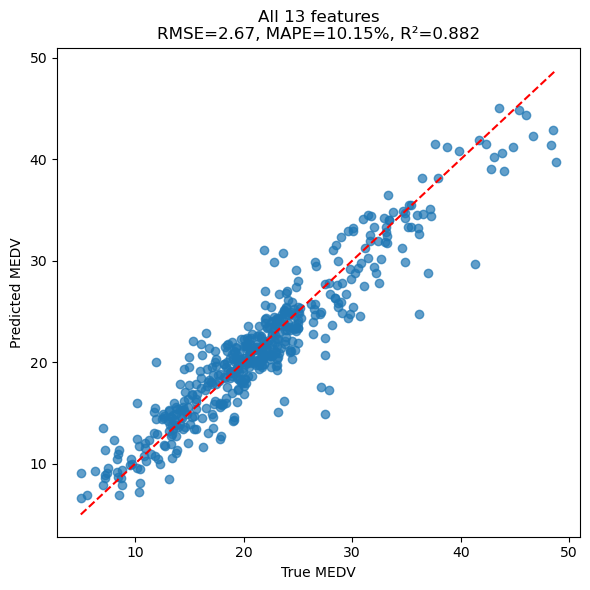

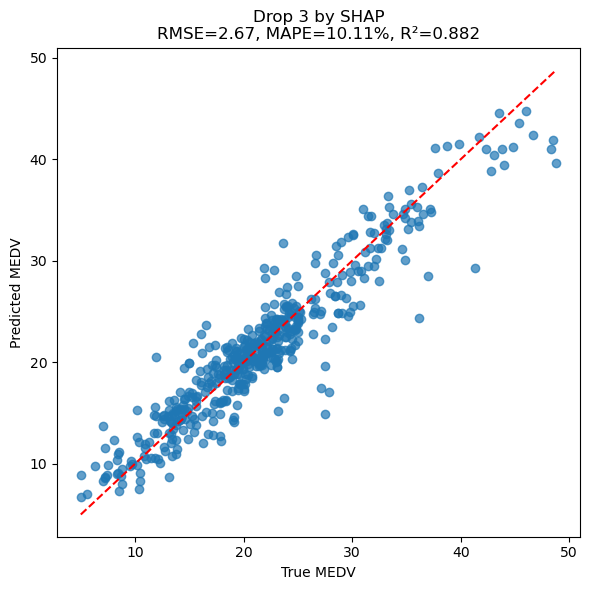

In [11]:
# =========================
# 0. 匯入套件與自訂函式
# =========================
import numpy as np
import pandas as pd
import xgboost as xgb
from xgboost import XGBRegressor
from sklearn.model_selection import KFold, RandomizedSearchCV
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import shap   # ★ 新增：做 SHAP 重要度分析


def mean_absolute_percentage_error(y_true, y_pred):
    """自訂 MAPE（百分比）"""
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100.0


# =========================
# 1. 讀取資料與前處理
# =========================
df = pd.read_csv("./BostonHousing.csv")

print("Missing values per column:")
print(df.isna().sum())
print()

# 移除 MEDV = 50 的封頂樣本
df = df[df["MEDV"] < 50].reset_index(drop=True)

# 原始特徵（13 個）
X_full = df.drop("MEDV", axis=1)
y = df["MEDV"]

print("原始 X_full shape :", X_full.shape)
print("y shape           :", y.shape)
print()

# =========================
# 1-1. SHAP：原始 13 個欄位的重要度與排序
# =========================
# 這裡用一個 XGBoost 模型（可用比較簡單的設定）先做 SHAP 分析
model_shap = XGBRegressor(
    objective="reg:squarederror",
    random_state=42,
    n_jobs=-1
)
model_shap.fit(X_full, y)

# 建立 SHAP 解釋器，計算每一筆資料、每一個特徵的 SHAP 值
# 建 SHAP explainer
explainer = shap.TreeExplainer(model_shap)
shap_values = explainer.shap_values(X_full)

# ========================
# 1) 蜂群圖（beeswarm）存成 PNG
# ========================
shap.summary_plot(shap_values, X_full, show=False)  # 不要自動 show，先讓我們存檔
plt.tight_layout()
plt.savefig("shap_beeswarm.png", dpi=300, bbox_inches="tight")
plt.show()   # 這行保留，還是會在 notebook 裡看到圖
plt.close()

# ========================
# 2) 長條圖（bar plot）存成 PNG
# ========================
shap.summary_plot(shap_values, X_full, plot_type="bar", show=False)
plt.tight_layout()
plt.savefig("shap_bar.png", dpi=300, bbox_inches="tight")
plt.show()
plt.close()

# ========================
# 3) 算 SHAP 重要度排序 & 決定要刪哪些欄位
# ========================
importance = np.abs(shap_values).mean(axis=0)
feature_ranking = sorted(
    list(zip(X_full.columns, importance)),
    key=lambda x: x[1],
    reverse=True
)

print("\n=== SHAP Feature Ranking (13 features) ===")
for name, score in feature_ranking:
    print(f"{name}: {score:.4f}")

# 假設刪除 SHAP 重要度最低的 3 個特徵
to_drop = [name for name, score in feature_ranking[-3:]]
print("\nDropped Features (by SHAP):", to_drop)

X_reduced = X_full.drop(columns=to_drop)
print("\nX_full shape    :", X_full.shape)
print("X_reduced shape :", X_reduced.shape)

# =========================
# 1-2. 目標做 log1p 轉換（之後的 CV 共用）
# =========================
y_np = y.values
y_log = np.log1p(y_np)


# =========================
# 2. RandomizedSearchCV 找 XGBoost 超參數
# =========================
param_dist = {
    "max_depth":        [3, 4, 5, 6],
    "min_child_weight": [1, 3, 5, 7],
    "subsample":        [0.7, 0.8, 0.9, 1.0],
    "colsample_bytree": [0.7, 0.8, 0.9, 1.0],
    "gamma":            [0, 0.1, 0.2],
    "reg_lambda":       [0.5, 1.0, 2.0, 5.0],   # L2
    "reg_alpha":        [0, 0.1, 0.5, 1.0],     # L1
    "n_estimators":     [300, 500, 800, 1200],  # 最大樹數
    "learning_rate":    [0.03, 0.05, 0.07],
}

base_model = XGBRegressor(
    objective="reg:squarederror",
    random_state=42,
    n_jobs=-1
)

# ---- (a) 原始 13 特徵 ----
print("=== RandomizedSearchCV on X_full (13 features) ===")
X_full_np = X_full.values

search_full = RandomizedSearchCV(
    estimator=base_model,
    param_distributions=param_dist,
    n_iter=40,
    scoring="neg_root_mean_squared_error",
    cv=5,
    verbose=1,
    n_jobs=-1,
    random_state=42
)
search_full.fit(X_full_np, y_log)

best_params_full = search_full.best_params_
print("Best params (full):", best_params_full)
print("Best CV RMSE (log space):", -search_full.best_score_)
print()

# ---- (b) SHAP 刪掉 3 個特徵後的 X_reduced ----
print("=== RandomizedSearchCV on X_reduced (after SHAP drop 3) ===")
X_red_np = X_reduced.values

search_red = RandomizedSearchCV(
    estimator=base_model,
    param_distributions=param_dist,
    n_iter=40,
    scoring="neg_root_mean_squared_error",
    cv=5,
    verbose=1,
    n_jobs=-1,
    random_state=42
)
search_red.fit(X_red_np, y_log)

best_params_red = search_red.best_params_
print("Best params (reduced):", best_params_red)
print("Best CV RMSE (log space):", -search_red.best_score_)
print()


# =========================
# 3. 共用的 K-fold + early stopping 函式
# =========================
def run_cv_and_collect_predictions(X_np, y_np, y_log, best_params,
                                   n_splits=5, seed=42,
                                   print_train=False, label=""):
    """
    給定特徵 X_np、目標 y_np (與其 log: y_log)、以及 best_params，
    做 5-fold CV，回傳：
      - y_all_true: 所有驗證資料的真實值
      - y_all_pred: 所有驗證資料的預測值
      - metrics: dict，裡面有 train/valid 的 RMSE / MAPE / R2 平均
    """
    kf = KFold(n_splits=n_splits, shuffle=True, random_state=seed)

    train_rmse_list, train_mape_list, train_r2_list = [], [], []
    valid_rmse_list, valid_mape_list, valid_r2_list = [], [], []

    all_y_true = []
    all_y_pred = []

    if label:
        print(f"===== {label} =====")

    fold = 1
    for train_idx, valid_idx in kf.split(X_np):
        X_train, X_valid = X_np[train_idx], X_np[valid_idx]
        y_train_log = y_log[train_idx]
        y_valid_log = y_log[valid_idx]

        y_train_true = y_np[train_idx]
        y_valid_true = y_np[valid_idx]

        dtrain = xgb.DMatrix(X_train, label=y_train_log)
        dvalid = xgb.DMatrix(X_valid, label=y_valid_log)

        params = {
            "objective": "reg:squarederror",
            "max_depth":        best_params["max_depth"],
            "min_child_weight": best_params["min_child_weight"],
            "subsample":        best_params["subsample"],
            "colsample_bytree": best_params["colsample_bytree"],
            "gamma":            best_params["gamma"],
            "lambda":           best_params["reg_lambda"],
            "alpha":            best_params["reg_alpha"],
            "eta":              best_params["learning_rate"],
            "eval_metric":      "rmse",
            "seed":             seed,
        }

        num_round = best_params["n_estimators"]
        evals = [(dtrain, "train"), (dvalid, "valid")]

        booster = xgb.train(
            params=params,
            dtrain=dtrain,
            num_boost_round=num_round,
            evals=evals,
            early_stopping_rounds=50,
            verbose_eval=False
        )

        # ---- Train 預測 ----
        if hasattr(booster, "best_ntree_limit"):
            train_pred_log = booster.predict(dtrain, ntree_limit=booster.best_ntree_limit)
        else:
            train_pred_log = booster.predict(dtrain)
        train_pred = np.expm1(train_pred_log)

        train_mse  = mean_squared_error(y_train_true, train_pred)
        train_rmse = np.sqrt(train_mse)
        train_mape = mean_absolute_percentage_error(y_train_true, train_pred)
        train_r2   = r2_score(y_train_true, train_pred)

        train_rmse_list.append(train_rmse)
        train_mape_list.append(train_mape)
        train_r2_list.append(train_r2)

        # ---- Valid 預測 ----
        if hasattr(booster, "best_ntree_limit"):
            valid_pred_log = booster.predict(dvalid, ntree_limit=booster.best_ntree_limit)
        else:
            valid_pred_log = booster.predict(dvalid)
        valid_pred = np.expm1(valid_pred_log)

        valid_mse  = mean_squared_error(y_valid_true, valid_pred)
        valid_rmse = np.sqrt(valid_mse)
        valid_mape = mean_absolute_percentage_error(y_valid_true, valid_pred)
        valid_r2   = r2_score(y_valid_true, valid_pred)

        valid_rmse_list.append(valid_rmse)
        valid_mape_list.append(valid_mape)
        valid_r2_list.append(valid_r2)

        all_y_true.append(y_valid_true)
        all_y_pred.append(valid_pred)

        # 印出每 fold 結果
        if print_train:
            print(f"Fold {fold}:")
            print(f"  Train - RMSE = {train_rmse:.3f}, MAPE = {train_mape:.2f}%, R^2 = {train_r2:.3f}")
            print(f"  Valid - RMSE = {valid_rmse:.3f}, MAPE = {valid_mape:.2f}%, R^2 = {valid_r2:.3f}")
            print("-" * 50)
        else:
            print(f"Fold {fold}: MAPE={valid_mape:.2f}%, RMSE={valid_rmse:.4f}, R^2={valid_r2:.3f}")

        fold += 1

    y_all_true = np.concatenate(all_y_true)
    y_all_pred = np.concatenate(all_y_pred)

    metrics = {
        "train_rmse_mean": np.mean(train_rmse_list),
        "train_rmse_std":  np.std(train_rmse_list),
        "train_mape_mean": np.mean(train_mape_list),
        "train_mape_std":  np.std(train_mape_list),
        "train_r2_mean":   np.mean(train_r2_list),
        "train_r2_std":    np.std(train_r2_list),
        "valid_rmse_mean": np.mean(valid_rmse_list),
        "valid_rmse_std":  np.std(valid_rmse_list),
        "valid_mape_mean": np.mean(valid_mape_list),
        "valid_mape_std":  np.std(valid_mape_list),
        "valid_r2_mean":   np.mean(valid_r2_list),
        "valid_r2_std":    np.std(valid_r2_list),
    }

    # 總結
    print("==========================================")
    print("Train 5-fold Average:")
    print(f"  RMSE = {metrics['train_rmse_mean']:.3f} ± {metrics['train_rmse_std']:.3f}")
    print(f"  MAPE = {metrics['train_mape_mean']:.2f}% ± {metrics['train_mape_std']:.2f}%")
    print(f"  R^2  = {metrics['train_r2_mean']:.3f} ± {metrics['train_r2_std']:.3f}")
    print("Valid 5-fold Average:")
    print(f"  RMSE = {metrics['valid_rmse_mean']:.3f} ± {metrics['valid_rmse_std']:.3f}")
    print(f"  MAPE = {metrics['valid_mape_mean']:.2f}% ± {metrics['valid_mape_std']:.2f}%")
    print(f"  R^2  = {metrics['valid_r2_mean']:.3f} ± {metrics['valid_r2_std']:.3f}")
    print()

    return y_all_true, y_all_pred, metrics


# =========================
# 4. 執行 5-fold CV：13 特徵 vs SHAP 刪 3 特徵
# =========================
# (a) 原始 13 特徵
y_test_full, y_pred_full, metrics_full = run_cv_and_collect_predictions(
    X_np=X_full_np,
    y_np=y_np,
    y_log=y_log,
    best_params=best_params_full,
    print_train=True,
    label="Full model (13 features)"
)

# (b) SHAP 刪掉 3 特徵後的 X_reduced
y_test_red, y_pred_red, metrics_red = run_cv_and_collect_predictions(
    X_np=X_red_np,
    y_np=y_np,
    y_log=y_log,
    best_params=best_params_red,
    print_train=True,   # ★ 改成 True，會印出 Train / Valid 全部指標
    label="Reduced model (drop 3 by SHAP)"
)

rmse_f  = metrics_full["valid_rmse_mean"]
mape_f  = metrics_full["valid_mape_mean"]
r2_f    = metrics_full["valid_r2_mean"]

rmse_r  = metrics_red["valid_rmse_mean"]
mape_r  = metrics_red["valid_mape_mean"]
r2_r    = metrics_red["valid_r2_mean"]


# =========================
# 5. 畫散佈圖並輸出 PNG（分成兩張圖）
# =========================

# --- 圖 1：13 個特徵 ---
fig1 = plt.figure(figsize=(6, 6))
ax1 = fig1.add_subplot(1, 1, 1)

ax1.scatter(y_test_full, y_pred_full, alpha=0.7)
min_val_full = min(y_test_full.min(), y_pred_full.min())
max_val_full = max(y_test_full.max(), y_pred_full.max())
ax1.plot([min_val_full, max_val_full],
         [min_val_full, max_val_full],
         'r--')

ax1.set_xlabel("True MEDV")
ax1.set_ylabel("Predicted MEDV")
ax1.set_title(f"All 13 features\nRMSE={rmse_f:.2f}, MAPE={mape_f:.2f}%, R²={r2_f:.3f}")

plt.tight_layout()
fig1.savefig("xgboost_full_only.png", dpi=300, bbox_inches="tight")
plt.show()


# --- 圖 2：SHAP 刪 3 個特徵 ---
fig2 = plt.figure(figsize=(6, 6))
ax2 = fig2.add_subplot(1, 1, 1)

ax2.scatter(y_test_red, y_pred_red, alpha=0.7)
min_val_red = min(y_test_red.min(), y_pred_red.min())
max_val_red = max(y_test_red.max(), y_pred_red.max())
ax2.plot([min_val_red, max_val_red],
         [min_val_red, max_val_red],
         'r--')

ax2.set_xlabel("True MEDV")
ax2.set_ylabel("Predicted MEDV")
ax2.set_title(f"Drop 3 by SHAP\nRMSE={rmse_r:.2f}, MAPE={mape_r:.2f}%, R²={r2_r:.3f}")

plt.tight_layout()
fig2.savefig("xgboost_reduced_only.png", dpi=300, bbox_inches="tight")
plt.show()
